## Import Library

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [25]:
# Load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [26]:
# Describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [27]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [28]:
# Check missing value
df.isnull().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


# Data Transformation

In [29]:
# Encode categorical variable (Education)
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

In [30]:
# Check all numeric columns
print("\nDataset after encoding:")
display(df.head())


Dataset after encoding:


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


# Exploratory Data Analysis

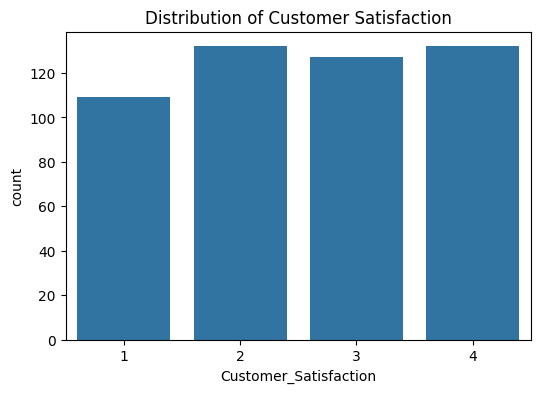

In [31]:
# 1. Barplot Customer Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(x='Customer_Satisfaction', data=df)
plt.title("Distribution of Customer Satisfaction")
plt.show()

Based on the distribution graph, customer satisfaction levels are relatively balanced across categories 1 to 4. This indicates that, in general, customers are not overly extreme in evaluating the service, there is still room for the company to improve and increase customer satisfaction toward higher categories.

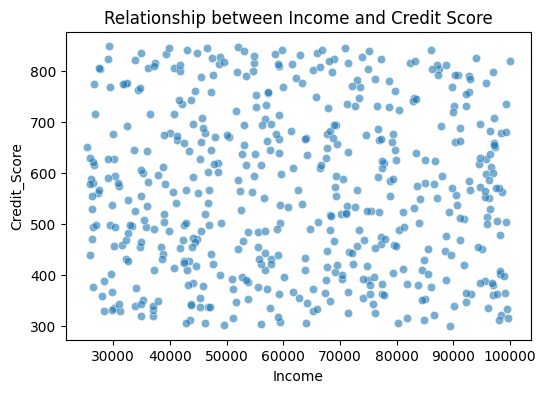

In [32]:
# 2. Boxplot Income vs Credit_Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='Income', y='Credit_Score', data=df, alpha=0.6)
plt.title("Relationship between Income and Credit Score")
plt.show()

Based on the scatter plot, the relationship between Income and Credit Score appears weak and does not show a clear linear pattern. This indicates that income level is not always directly proportional to a customer’s credit score. Therefore, credit risk evaluation should consider additional factors such as customer tenure, transaction volume, and payment behavior to produce more accurate results.

# Scaling Data

In [33]:
# --- Data Unscaled ---
X_unscaled = df[['Age', 'Income', 'Credit_Score', 'Balance']]

# --- Data Scaled ---
sc = StandardScaler()
df_scaled = df.copy()
df_scaled[['Age', 'Income', 'Credit_Score', 'Balance']] = sc.fit_transform(
    df[['Age', 'Income', 'Credit_Score', 'Balance']]
)
X_scaled = df_scaled[['Age', 'Income', 'Credit_Score', 'Balance']]


In [34]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.158274e-16,1.421085e-16,1.432000,2.593481e-16,10.806000,48.486000,-3.392842e-16,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,1.001002e+00,1.001002e+00,1.109883,1.001002e+00,5.151061,28.742339,1.001002e+00,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,-1.687691e+00,-1.688120e+00,0.000000,-1.666120e+00,1.000000,1.000000,-1.716418e+00,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,-8.535233e-01,-8.444436e-01,0.000000,-8.739031e-01,7.000000,25.000000,-8.547889e-01,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,-3.347132e-02,-7.746485e-02,1.000000,-1.881200e-02,11.000000,48.000000,-3.416637e-02,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,8.033504e-01,8.429096e-01,2.000000,7.985545e-01,15.000000,72.000000,8.593735e-01,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,1.723192e+00,1.839982e+00,3.000000,1.785682e+00,19.000000,99.000000,1.683474e+00,49971.895230,19968.520560,0.993942,4.000000,0.999897


# Sillhouette Score

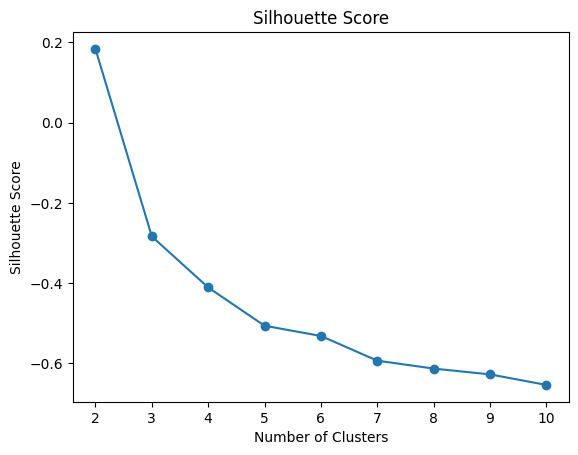

In [35]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

# Comparing Silhouette Score to get best combination of linkage and metric



Skipping Ward linkage with Manhattan metric (not supported).


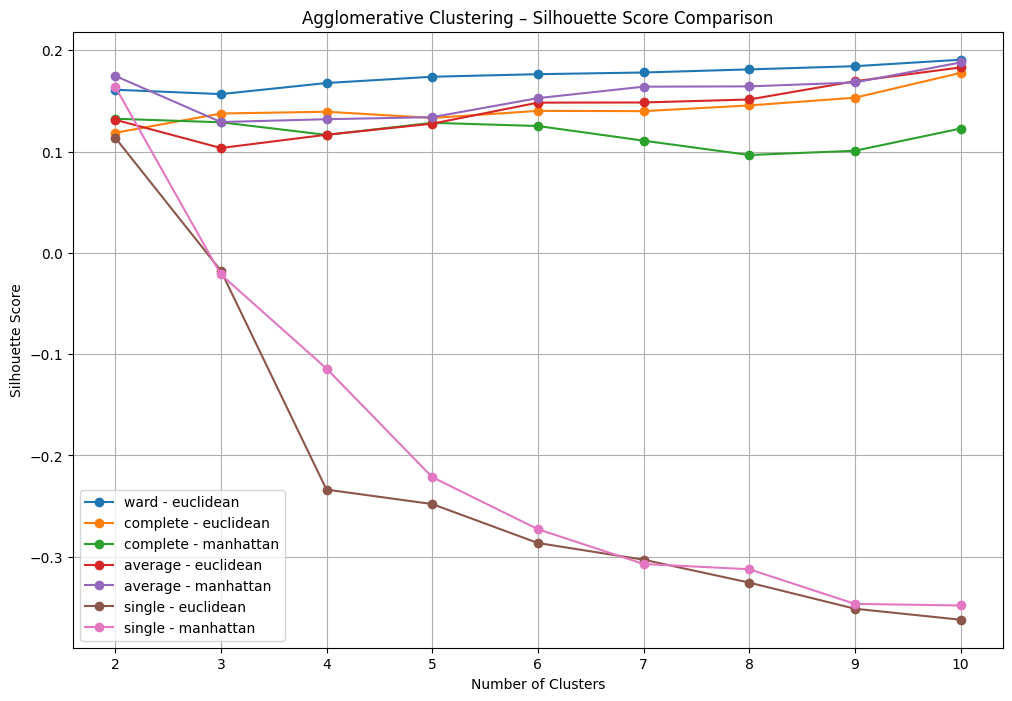


✅ Best Silhouette Score: 0.191
Optimal Number of Clusters: 10
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''
results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(X_scaled)
            silhouette_avg = silhouette_score(X_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering – Silhouette Score Comparison")
plt.legend()
plt.grid(True)
plt.show()

print(f"\n✅ Best Silhouette Score: {best_silhouette_score:.3f}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


## Dendogram Visualization

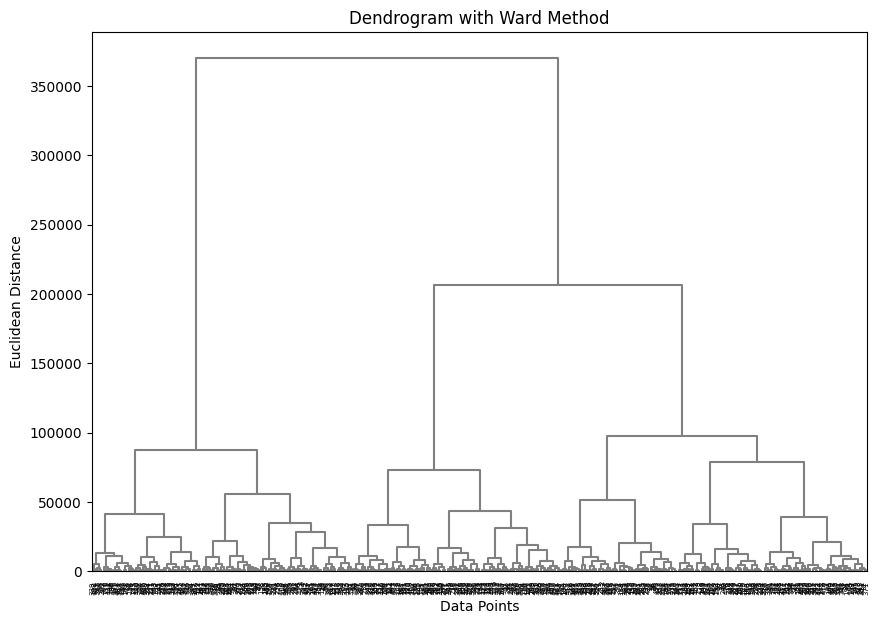

In [37]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Hierarchical Clustering Model

In [38]:
# Tentukan jumlah cluster (misalnya 3)
n_clusters = 3

# --- Model Unscaled ---
agg_unscaled = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#labels_unscaled = agg_unscaled.fit_predict(X_unscaled)
y_hc_unscaled = agg_unscaled.fit_predict(X_unscaled)

# --- Model Scaled ---
agg_scaled = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#labels_scaled = agg_scaled.fit_predict(X_scaled)
y_hc_scaled = agg_scaled.fit_predict(X_scaled)

df['Cluster_Unscaled'] = y_hc_unscaled
df_scaled['Cluster_Scaled'] = y_hc_scaled

# Evaluation silhouette score
sil_unscaled = silhouette_score(X_unscaled, y_hc_unscaled)
sil_scaled = silhouette_score(X_scaled, y_hc_scaled)

print(f"\nSilhouette Score (Unscaled): {sil_unscaled:.3f}")
print(f"Silhouette Score (Scaled): {sil_scaled:.3f}")



Silhouette Score (Unscaled): 0.523
Silhouette Score (Scaled): 0.157


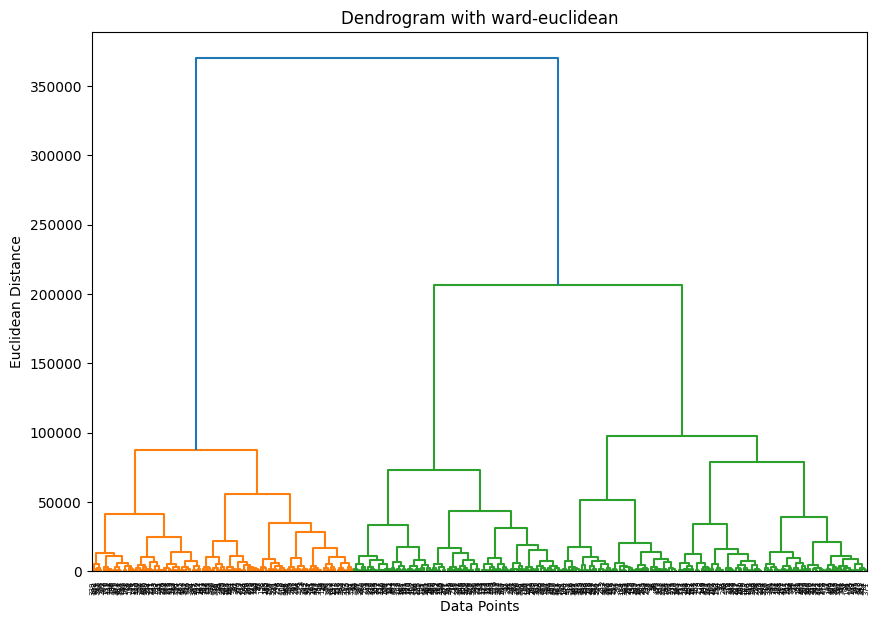

In [39]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [40]:
# Add the cluster labels to the original data UNSCALED
df['Agglo Unscaled'] = y_hc_unscaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Unscaled,Agglo Unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,1
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,1
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0


In [41]:
# Add the cluster labels to the original data SCALED
df['Agglo Scaled'] = y_hc_scaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Unscaled,Agglo Unscaled,Agglo Scaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,1,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1,1,0
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,1,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1,1,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0,1


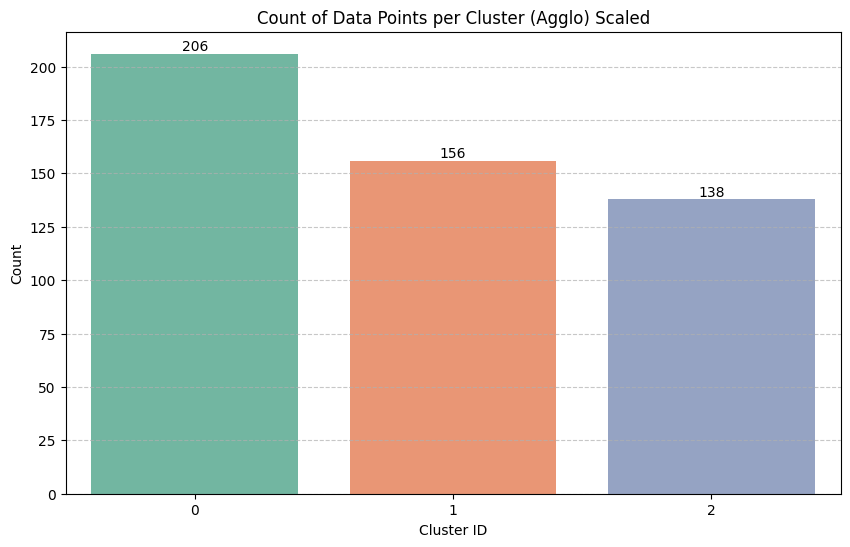

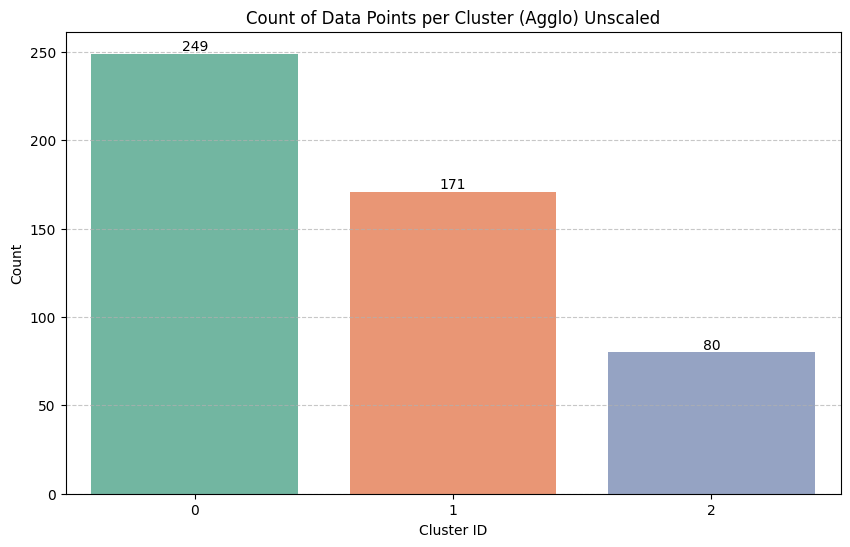

In [42]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo) Scaled')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------------------------------------------

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo Unscaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo) Unscaled')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

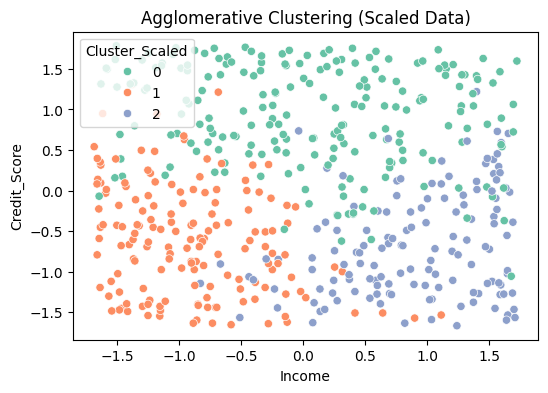

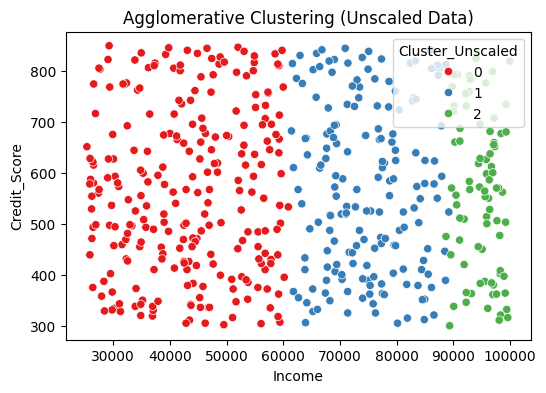

In [43]:
# Visualisasi hasil clustering (2D)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_scaled['Income'], y=X_scaled['Credit_Score'],
                hue=df_scaled['Cluster_Scaled'], palette='Set2')
plt.title("Agglomerative Clustering (Scaled Data)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_unscaled['Income'], y=X_unscaled['Credit_Score'],
                hue=df['Cluster_Unscaled'], palette='Set1')
plt.title("Agglomerative Clustering (Unscaled Data)")
plt.show()

In [44]:
import plotly.express as px

x_col = 'Age'
y_col = 'Income'
z_col = 'Credit_Score'

fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo Unscaled'].astype(str),
    title=f"3D Scatter Plot of Customers by Agglo Clusters ({x_col}, {y_col}, {z_col})",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.update_layout(
    legend_title_text='Cluster (Agglo)',
    scene=dict(
        xaxis_title=x_col,
        yaxis_title=y_col,
        zaxis_title=z_col
    )
)

fig.show()

# Segmentation & Managerial Implication

In [45]:
# Which model is better by sil_score
if sil_scaled > sil_unscaled:
    print("✅ Model dengan data SCALING memberikan hasil clustering yang lebih baik.")
else:
    print("✅ Model dengan data UNSCALED memberikan hasil clustering yang lebih baik.")


✅ Model dengan data UNSCALED memberikan hasil clustering yang lebih baik.


In [46]:
# Statistical Summary for each cluster
summary_unscaled = df.groupby('Cluster_Unscaled').mean()
print("\nCluster Characteristics (Unscaled Data):")
display(summary_unscaled)



Cluster Characteristics (Unscaled Data):


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo Unscaled,Agglo Scaled
Cluster_Unscaled,,,,,,,,,,,,,,
0,43184.155151,40.293173,1.393574,565.297189,10.971888,50.755020,4834.491879,25622.326433,10965.515700,0.510935,2.518072,0.521338,0.0,0.666667
1,74747.930870,39.239766,1.450292,568.315789,10.771930,46.087719,5075.866465,24577.420397,10132.268038,0.515542,2.590643,0.474929,1.0,0.947368
2,94845.759292,40.775000,1.512500,556.937500,10.362500,46.550000,5745.636899,26438.262850,10524.437280,0.512449,2.650000,0.452903,2.0,1.300000


# 1. Model Evaluation — Scaled vs. Unscaled

Based on the evaluation results using the Silhouette Score, the model with unscaled data produced better clustering performance compared to the model with scaled data.
This indicates that the cluster structure formed on the original data is clearer and more representative of the natural variation among customers.

Why is the Unscaled Model Better?
In this dataset, variables such as Income, Credit_Score, and Age are already on relatively comparable scales and have direct financial meanings.
When scaling is applied, the natural relationships among these variables can be slightly distorted because standardization removes the original numerical context (for example, the real income differences among customers).
As a result, the scaled model produces clusters that are less reflective of real-world financial conditions.

Conclusion:
The unscaled data model provides a more realistic and representative clustering outcome for customer segmentation.

# 2. Cluster Characteristics

The clustering result (unscaled) produces three main customer groups with the following characteristics:

## Cluster 0 Middle-Class Loyal Customers

Profile: Income around 43K, age ±40 years, bank relationship duration ±11 years.
Traits: Financially stable, active in using basic services, and has moderate customer satisfaction.
Meaning: Core customer segment with strong long-term retention potential.

## Cluster 1 Upper-Middle Professionals

Profile: High income (~75K), age ±39 years, stable credit score (568), and balanced financial standing.
Traits: Productive customers with solid financials but not yet highly digitally engaged.
Meaning: Established segment with potential for high-value financial products.

## Cluster 2 High-Income Passive Customers

Profile: Highest income (~95K), age ±41 years, top balance and loan approval amount, but low digital activity.
Traits: High-value customers with minimal digital interaction.
Meaning: Valuable segment that can be optimized through personalized approaches.

# 3. Managerial Recommendations
Cluster 0 — Loyal Middle-Class

Strategies:
- Loyalty programs with point-based or cashback rewards for recurring purchases.
- Financial education and digital banking promotion.
- Cross-selling mid-term saving and investment products.
Key KPIs: Customer Retention Rate, Transaction Frequency, Digital Adoption Rate.

Cluster 1 — Upper-Middle Professionals

Strategies:
- Offer premium products such as exclusive credit cards and personalized investment packages.
- Use data-driven CRM approaches for personalized offers.
- Promote via email campaigns and mobile app channels.
Key KPIs: Average Balance, Cross-sell Ratio, Customer Lifetime Value (CLV).

Cluster 2 — High-Income Passive Customers

Strategies:
- Personalized approach (relationship manager, financial consultation).
- Exclusive promotions to reactivate customers (investment vouchers, high-value rewards).
- UX analysis to increase digital engagement.
Key KPIs: Reactivation Rate, Product Penetration, Engagement Score.